In [1]:
import numpy as np
# simulated data

n = 184
x = np.random.uniform(0, 100,n)
d = np.random.uniform(x, 100,n)
y =  68  - 0.705*d  -0.003*d**2 + 0.157*x -0.004*x**2 + np.random.lognormal(size=n)*3


In [2]:
# fit ols model
import statsmodels.formula.api as smf
import pandas as pd
df = pd.DataFrame({'x':x,'d':d,'y':y})
# runs regression model
reg_model = smf.ols(formula='y ~ d + I(d**2)  + x + I(x**2)', data=df)
ols = reg_model.fit()

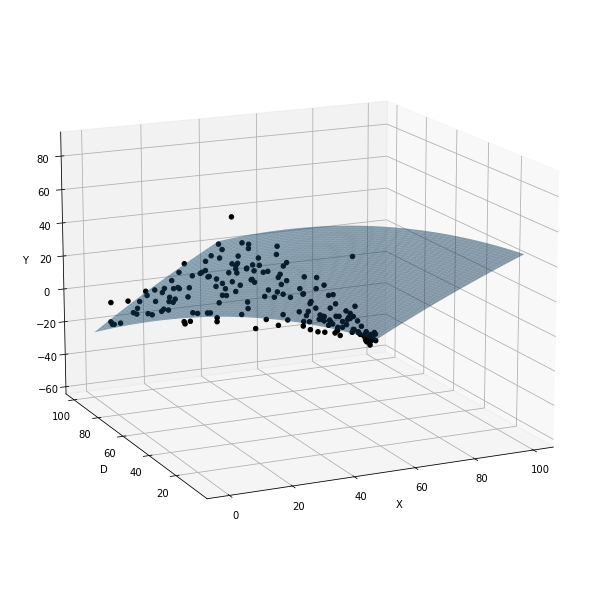

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Create the 3d plot
xx1, xx2 = np.meshgrid(np.linspace(x.min(), x.max(), 100),
np.linspace(d.min(), d.max(), 100))

# plot the hyperplane by evaluating the parameters on the grid
x_grid_val = np.array([xx1.ravel(), xx2.ravel()])[0]
d_grid_val = np.array([xx1.ravel(), xx2.ravel()])[1]
y_hat_grid = ols.predict(pd.DataFrame({'x':x_grid_val,'d':d_grid_val})).values.reshape(xx1.shape)

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15,auto_add_to_figure=False)
fig.add_axes(ax)
# plot data points
ax.scatter(x, d, y, color='black',alpha=1)

# plot hyperplane
#surf = ax.plot_surface(xx1, xx2, y_hat_grid,  alpha=0.5, linewidth=0)
surf = ax.plot_surface(xx1, xx2, y_hat_grid,  alpha=0.5, linewidth=0)

# set axis labels
ax.set_xlabel('X')
ax.set_ylabel('D')
ax.set_zlabel('Y')
plt.show()